### features:
* selected spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet of level 0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
import itertools

In [2]:
csv_path = "/Users/ecem/Desktop/gyrocardiogram/s-vs-r/feature_extr"

## Load data

Here, our target is to predict disease correctly. So; our y will be disease column of  dataset

In [3]:
features = pd.read_csv(csv_path + "/spectral_features.csv", index_col = 0)

In [4]:
features

,SC x,SC z,SS y,SR y,SS z,SR x,SR z,SE z,SE x,SE y,SC y,E z,SS x,E x,E y
0,0.265644,4.157178e-01,0.266299,0.177344,0.311216,0.186719,8.101563e-01,2.720335,1.147296,1.137282,0.246914,3.216961,0.277956,3.076283,3.159694
1,0.279646,4.310229e-01,0.277671,0.246875,0.307812,0.203906,8.484375e-01,2.980266,1.200881,1.497325,0.276328,3.298141,0.278084,3.038338,3.238392
2,0.297894,4.308083e-01,0.274223,0.235156,0.303927,0.227344,8.351563e-01,2.967876,1.192592,1.464650,0.274229,3.299910,0.285333,3.057839,3.255923
3,0.297172,4.365125e-01,0.276357,0.260156,0.302908,0.197656,8.476562e-01,3.041578,1.046914,1.532031,0.278313,3.304233,0.287122,2.865379,3.291108
4,0.293139,4.396676e-01,0.271878,0.217969,0.302744,0.196094,8.484375e-01,3.049081,1.122829,1.396609,0.268818,3.311308,0.287785,2.932381,3.215899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,-0.342749,2.146985e-314,0.313289,-1.411189,0.317396,-0.342749,7.085093e+91,1.680623,0.277297,0.689034,-1.411189,3.289960,0.285787,3.135881,3.175903
2013,0.194755,1.242809e+151,0.270916,-1.064346,0.233114,0.194755,5.981993e-154,1.476057,1.367344,2.114864,-1.064346,1.345448,0.187350,1.590117,1.829873
2014,-0.311291,2.146985e-314,0.212103,1.797036,0.167797,-0.311291,4.056030e+232,0.663752,0.538687,0.704298,1.797036,2.099313,0.168540,1.893738,2.026987
2015,0.464122,2.146985e-314,0.216680,1.861138,0.187534,0.464122,2.181744e+243,0.412348,0.590904,0.428958,1.861138,1.494696,0.214936,1.966712,1.872642


In [11]:
features.isna().sum()

SC x    0
SC z    0
SS y    0
SR y    0
SS z    0
SR x    0
SR z    0
SE z    0
SE x    0
SE y    0
SC y    0
E z     0
SS x    0
E x     0
E y     0
dtype: int64

In [14]:
features[features == np.inf].count()

SC x    0
SC z    0
SS y    0
SR y    0
SS z    0
SR x    0
SR z    0
SE z    0
SE x    0
SE y    0
SC y    0
E z     0
SS x    0
E x     0
E y     0
dtype: int64

In [5]:
y = np.concatenate( [np.ones((1070)), np.zeros((2017))] )

In [6]:
y.shape

(3087,)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(features)

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/extmath.py:999: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/extmath.py:1005: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/extmath.py:1005: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [18]:
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [19]:
predictions = model.predict(X_valid)

In [20]:
classes = ['S', 'R']

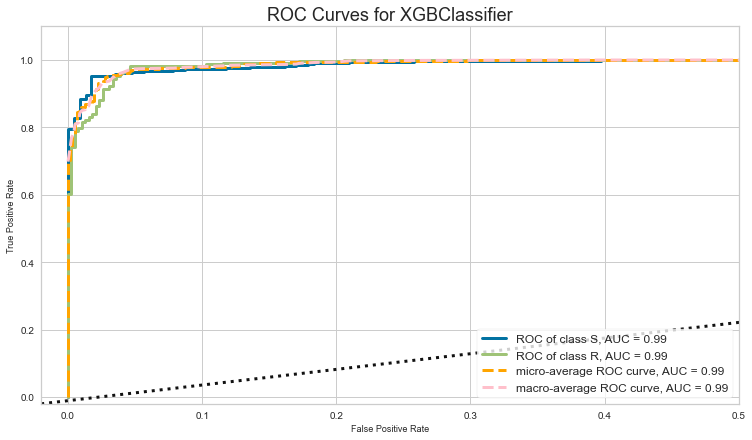

In [21]:
rocauc = ROCAUC(model, size=(900, 500), classes=classes )

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


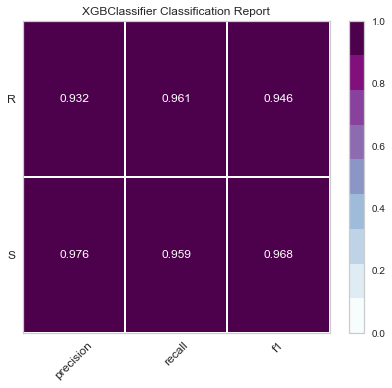

In [22]:
report = ClassificationReport(model, size=(425, 400), classes=classes, cmap = 'BuPu' )

report.score(X_valid, y_valid)
c = report.poof()

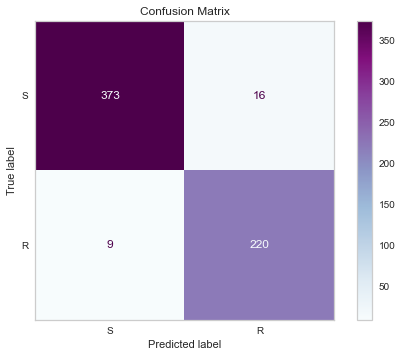

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
conf =  ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, display_labels= ['S', 'R'], cmap = 'BuPu') 
conf.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

accuracy: 95.95%
recall: 95.95%
precision: 96.00%


### with 0.0001 variation

In [29]:
vt = VarianceThreshold(threshold = 0.2)
_ = vt.fit(x_train)
masked = vt.get_support()
features_masked = features.loc[:, masked]
features_masked # uncomment to see the dataframe

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


,SC x,SS y,SR y,SS z,SR x,SE z,SE x,SE y,SC y,E z,SS x,E x,E y
0,0.265644,0.266299,0.177344,0.311216,0.186719,2.720335,1.147296,1.137282,0.246914,3.216961,0.277956,3.076283,3.159694
1,0.279646,0.277671,0.246875,0.307812,0.203906,2.980266,1.200881,1.497325,0.276328,3.298141,0.278084,3.038338,3.238392
2,0.297894,0.274223,0.235156,0.303927,0.227344,2.967876,1.192592,1.464650,0.274229,3.299910,0.285333,3.057839,3.255923
3,0.297172,0.276357,0.260156,0.302908,0.197656,3.041578,1.046914,1.532031,0.278313,3.304233,0.287122,2.865379,3.291108
4,0.293139,0.271878,0.217969,0.302744,0.196094,3.049081,1.122829,1.396609,0.268818,3.311308,0.287785,2.932381,3.215899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,-0.342749,0.313289,-1.411189,0.317396,-0.342749,1.680623,0.277297,0.689034,-1.411189,3.289960,0.285787,3.135881,3.175903
2013,0.194755,0.270916,-1.064346,0.233114,0.194755,1.476057,1.367344,2.114864,-1.064346,1.345448,0.187350,1.590117,1.829873
2014,-0.311291,0.212103,1.797036,0.167797,-0.311291,0.663752,0.538687,0.704298,1.797036,2.099313,0.168540,1.893738,2.026987
2015,0.464122,0.216680,1.861138,0.187534,0.464122,0.412348,0.590904,0.428958,1.861138,1.494696,0.214936,1.966712,1.872642


In [30]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [31]:
import xgboost as xgb
model_  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror' ) 

# Fit the model
model_.fit(X_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
predictions_ = model_.predict(X_valid_)

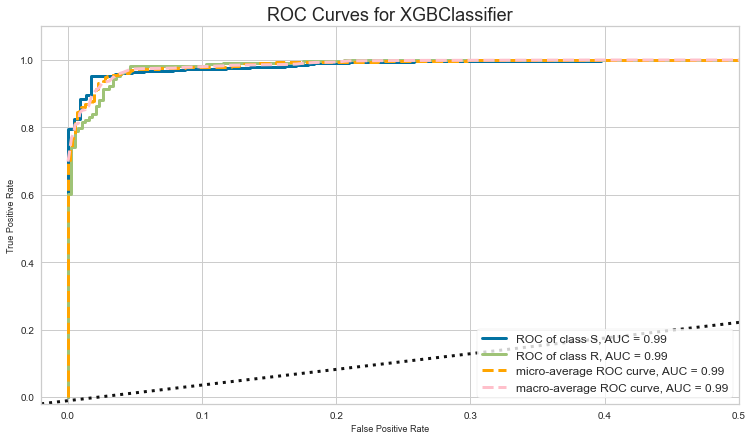

In [33]:
rocauc_ = ROCAUC(model_, size=(900, 500), classes=classes)

rocauc_.fit(X_train_, y_train_)       
rocauc_.score(X_valid_, y_valid_)  
r = rocauc_.poof()

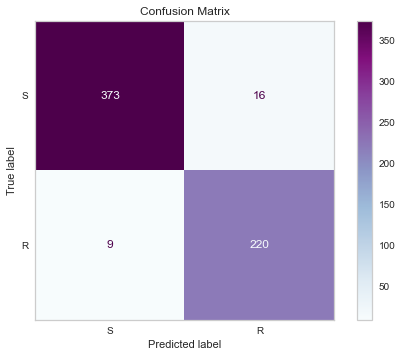

In [34]:
conf_ =  ConfusionMatrixDisplay.from_estimator(model_, X_valid_, y_valid_, display_labels= ['S','R' ], cmap = 'BuPu')   
conf_.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, predictions_)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.95%


In [36]:
recall = recall_score(y_valid_, predictions_, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid_, predictions_, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

recall: 95.95%
precision: 96.00%
